In [1]:
import numpy as np
import porespy as ps
import matplotlib.pyplot as plt
from skimage import data
ps.visualization.set_mpl_style()
np.random.seed(10)


In [2]:
im = ps.generators.blobs(shape=[200, 200, 200])
im3d = ps.visualization.show_3D(im)

<IPython.core.display.Javascript object>


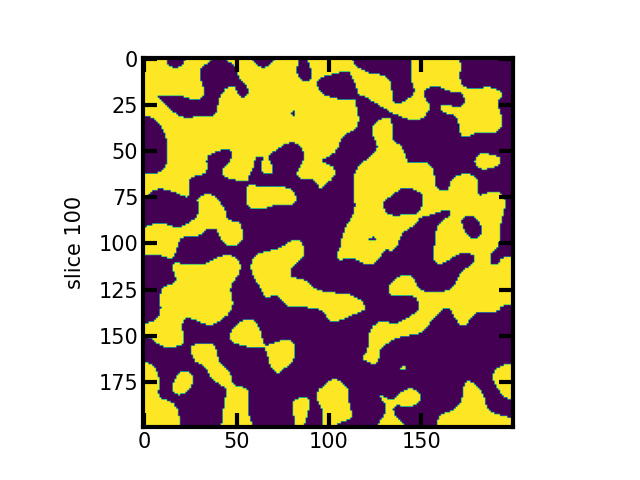

In [3]:
%matplotlib notebook

class IndexTracker:
    def __init__(self, ax, X):
        self.ax = ax
        self.X = X
        rows, cols, self.slices = X.shape
        self.ind = self.slices//2

        self.im = ax.imshow(self.X[:, :, self.ind])
        self.update()

    def on_scroll(self, event):
        print("%s %s" % (event.button, event.step))
        if event.button == 'up':
            self.ind = (self.ind + 1) % self.slices
        else:
            self.ind = (self.ind - 1) % self.slices
        self.update()

    def update(self):
        self.im.set_data(self.X[:, :, self.ind])
        self.ax.set_ylabel('slice %s' % self.ind)
        self.im.axes.figure.canvas.draw()


fig, ax = plt.subplots(1, 1)

X = im

tracker = IndexTracker(ax, X)


fig.canvas.mpl_connect('scroll_event', tracker.on_scroll)
plt.show()




